# Exploratory Data Analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/player_churn_data.csv")

In [3]:
df.head()

,player_id,total_playtime_hours,sessions_last_30d,sessions_last_7d,purchases_count,max_level,friends_count,churned
0,1,102,7,16,4,30,31,0
1,2,435,22,8,1,55,40,0
2,3,348,13,3,5,14,14,0
3,4,270,55,6,2,13,30,0
4,5,106,54,1,5,84,5,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   player_id             5000 non-null   int64
 1   total_playtime_hours  5000 non-null   int64
 2   sessions_last_30d     5000 non-null   int64
 3   sessions_last_7d      5000 non-null   int64
 4   purchases_count       5000 non-null   int64
 5   max_level             5000 non-null   int64
 6   friends_count         5000 non-null   int64
 7   churned               5000 non-null   int64
dtypes: int64(8)
memory usage: 312.6 KB


In [5]:
df.describe()

,player_id,total_playtime_hours,sessions_last_30d,sessions_last_7d,purchases_count,max_level,friends_count,churned
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,250.670600,29.827400,9.550800,4.473200,50.065000,24.773800,0.059600
std,1443.520003,144.570083,17.304124,5.758824,2.859531,28.562303,14.429784,0.236768
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1250.750000,127.000000,15.000000,5.000000,2.000000,25.000000,12.000000,0.000000
50%,2500.500000,252.000000,29.000000,10.000000,4.000000,50.000000,25.000000,0.000000
75%,3750.250000,378.000000,45.000000,15.000000,7.000000,75.000000,37.000000,0.000000
max,5000.000000,499.000000,59.000000,19.000000,9.000000,99.000000,49.000000,1.000000


In [6]:
df["churned"].value_counts(normalize=True)

churned
0    0.9404
1    0.0596
Name: proportion, dtype: float64

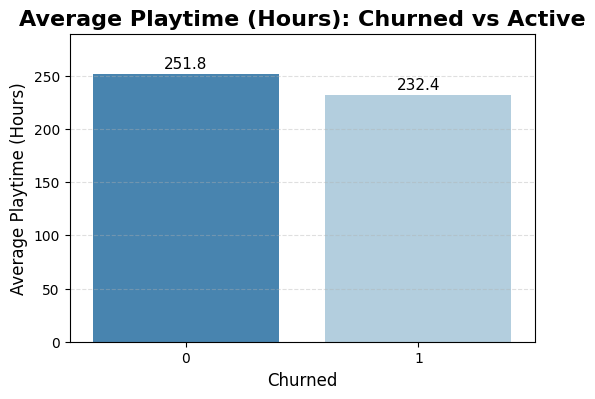

In [20]:
avg_playtime = df.groupby("churned")["total_playtime_hours"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(
    data=avg_playtime,
    x="churned",
    y="total_playtime_hours",
    hue="churned",
    palette="Blues_r",
    dodge=False,
    legend=False
)

plt.title("Average Playtime (Hours): Churned vs Active", fontsize=16, weight="bold")
plt.xlabel("Churned", fontsize=12)
plt.ylabel("Average Playtime (Hours)", fontsize=12)

for i, row in avg_playtime.iterrows():
    plt.text(
        i,
        row["total_playtime_hours"] * 1.02,
        f"{row['total_playtime_hours']:.1f}",
        ha="center",
        fontsize=11
    )

plt.grid(axis='y', linestyle="--", alpha=0.4)

plt.ylim(0, avg_playtime["total_playtime_hours"].max() * 1.15)

plt.savefig("../plots/churned_vs_active_avg_playtime.png", dpi=300, bbox_inches="tight")
plt.show()

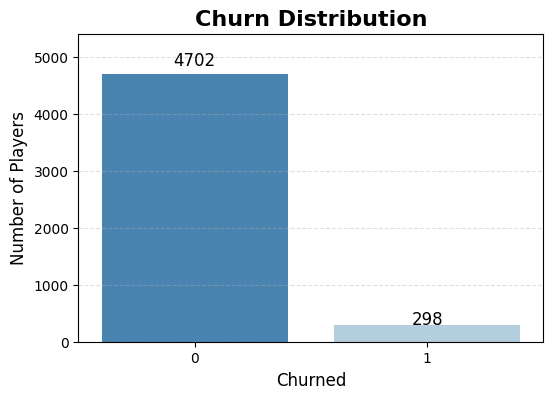

In [18]:
plt.figure(figsize=(6,4))

sns.countplot(
    data=df,
    x="churned",
    hue="churned",
    palette="Blues_r",
    dodge=False,
    legend=False
)

plt.title("Churn Distribution", fontsize=16, weight="bold")
plt.xlabel("Churned", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)

counts = df["churned"].value_counts()

plt.ylim(0, counts.max() * 1.15)

for i, v in enumerate(counts):
    plt.text(
        i,
        v * 1.03,
        str(v),
        ha='center',
        fontsize=12
    )

plt.grid(axis='y', linestyle="--", alpha=0.4)

plt.savefig("../plots/churn_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


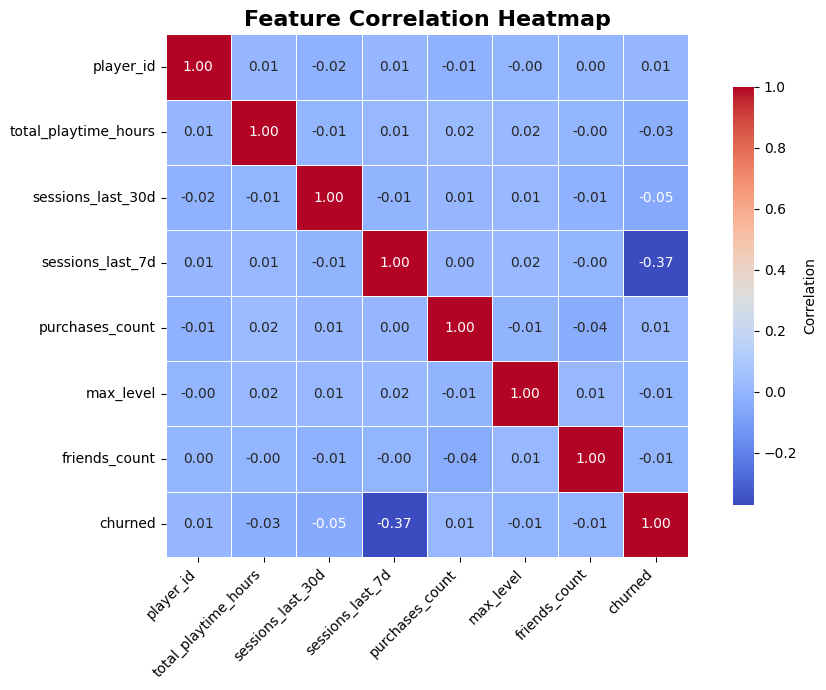

In [21]:
corr_matrix = df.corr()

plt.figure(figsize=(10,7))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    square=True
)

plt.title("Feature Correlation Heatmap", fontsize=16, weight="bold")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig("../plots/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()